In [19]:
import pandas
from datetime import datetime
from pytz import utc
import matplotlib.pyplot as plt

data = pandas.read_csv("./data/reviews.csv", parse_dates=['Timestamp'])
data.head()

,Course Name,Timestamp,Rating,Comment
0,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 06:25:52+00:00,4.0,NaN
1,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:12:34+00:00,4.0,NaN
2,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:11:03+00:00,4.0,NaN
3,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:33:24+00:00,5.0,NaN
4,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:31:49+00:00,4.5,NaN


## Rating Average by day

In [31]:
data['Day'] = data['Timestamp'].dt.date
day_average = data.groupby(['Day']).mean() # mean only work on number values, so others columns will be ignored
# day_average = data.groupby(['Day']).count()

day_average

,Rating
Day,
2018-01-01,4.532609
2018-01-02,4.122807
2018-01-03,4.360465
2018-01-04,4.531250
2018-01-05,4.423077
...,...
2021-03-29,4.240000
2021-03-30,4.428571
2021-03-31,4.453125


In [26]:
day_average.columns

Index(['Course Name', 'Timestamp', 'Rating', 'Comment'], dtype='object')

In [27]:
day_average.index

Index([2018-01-01, 2018-01-02, 2018-01-03, 2018-01-04, 2018-01-05, 2018-01-06,
       2018-01-07, 2018-01-08, 2018-01-09, 2018-01-10,
       ...
       2021-03-24, 2021-03-25, 2021-03-26, 2021-03-27, 2021-03-28, 2021-03-29,
       2021-03-30, 2021-03-31, 2021-04-01, 2021-04-02],
      dtype='object', name='Day', length=1188)

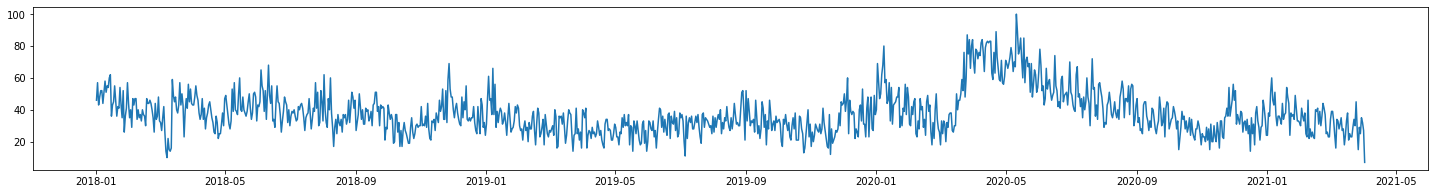

In [28]:
plt.figure(figsize=(25, 3))
plt.plot(day_average.index, day_average['Rating'])

In [29]:
day_average['Rating'].min()

7

In [30]:
day_average['Rating'].max()

100

## Rating average by week

In [47]:
data['Week'] = data['Timestamp'].dt.strftime("%Y-%U")
week_average = data.groupby(['Week']).mean()
week_average

,Rating
Week,
2018-00,4.434564
2018-01,4.424933
2018-02,4.417702
2018-03,4.401024
2018-04,4.468085
...,...
2021-09,4.560096
2021-10,4.627315
2021-11,4.629121


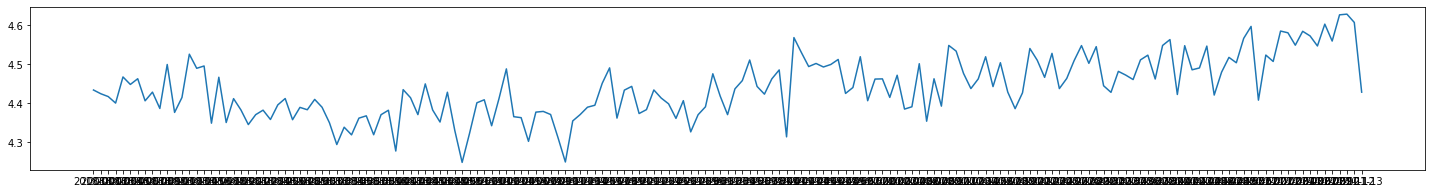

In [48]:
plt.figure(figsize=(25, 3))
plt.plot(week_average.index, week_average['Rating'])

## Average Rating by month

In [55]:
data['Month'] = data['Timestamp'].dt.strftime("%Y-%m")
month_average = data.groupby(['Month']).mean()
month_average.head()
# dir(data['Timestamp'].dt.isocalendar())

,Rating
Month,
2018-01,4.429645
2018-02,4.436248
2018-03,4.421671
2018-04,4.468211
2018-05,4.396420


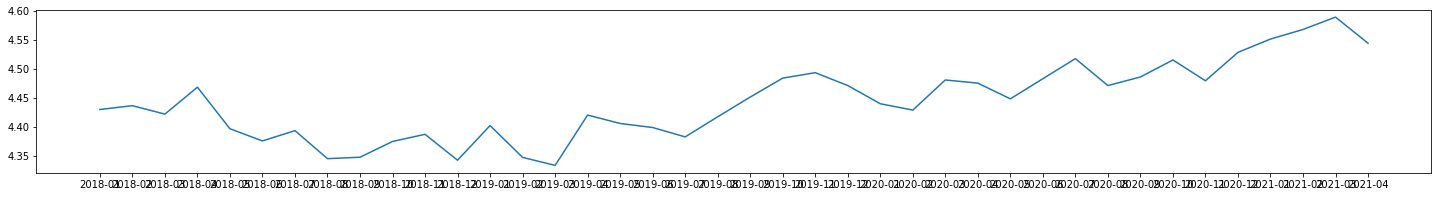

In [56]:
plt.figure(figsize=(25, 3))
plt.plot(month_average.index, month_average['Rating'])

## Average Rating by year

In [58]:
data['Year'] = data['Timestamp'].dt.strftime("%Y")
year_average = data.groupby(['Year']).mean()
year_average

,Rating
Year,
2018,4.393763
2019,4.418076
2020,4.476666
2021,4.567412


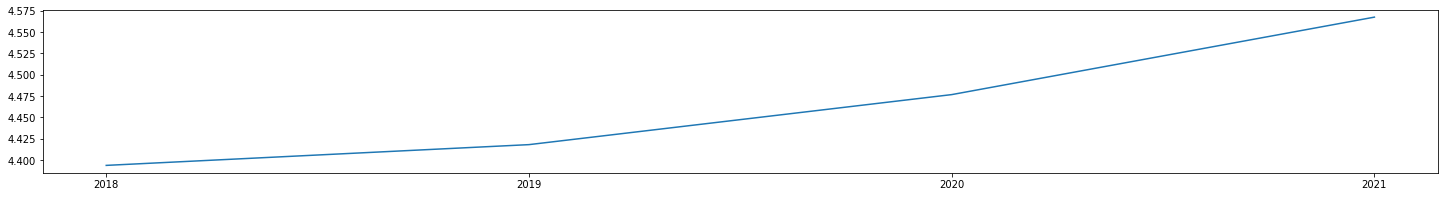

In [64]:
plt.figure(figsize=(25, 3))
plt.plot(year_average.index, year_average['Rating'])

## Average Rating by month by course

<AxesSubplot:xlabel='Month'>

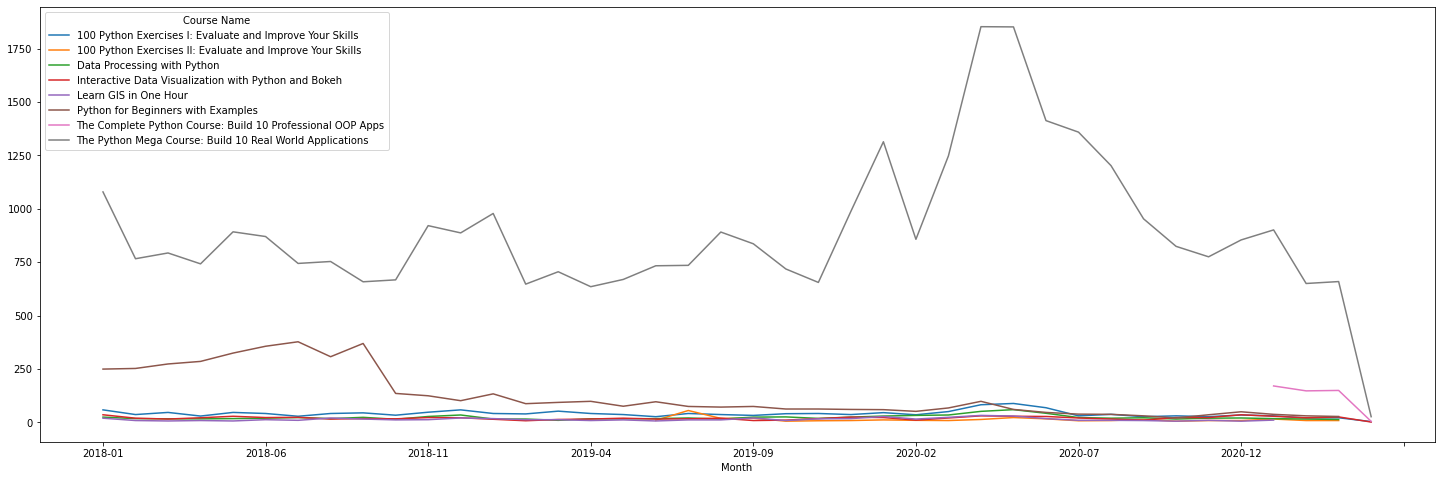

In [76]:
data['Month'] = data['Timestamp'].dt.strftime("%Y-%m")
# month_average_crs = data.groupby(['Month', 'Course Name']).mean().unstack()
month_average_crs = data.groupby(['Month', 'Course Name'])['Rating'].count().unstack()

month_average_crs.plot(figsize=(25, 8))
# month_average_crs

## What day of the week are people the happiest?

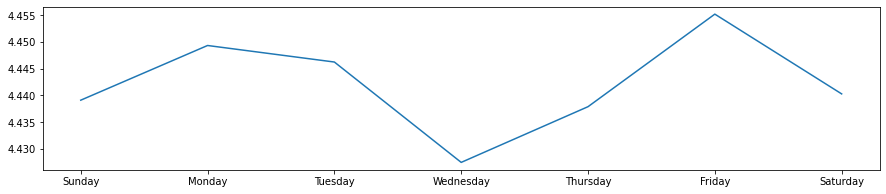

In [93]:
data['Weekday'] = data['Timestamp'].dt.strftime("%A")
data['Daynumber'] = data['Timestamp'].dt.strftime("%w")

weekday_average = data.groupby(['Weekday', 'Daynumber']).mean()
weekday_average = weekday_average.sort_values('Daynumber')
weekday_average.index.get_level_values(0)

plt.figure(figsize=(15, 3))
plt.plot(weekday_average.index.get_level_values(0), weekday_average['Rating'])

In [94]:
help(plt.pie)

Help on function pie in module matplotlib.pyplot:

pie(x, explode=None, labels=None, colors=None, autopct=None, pctdistance=0.6, shadow=False, labeldistance=1.1, startangle=0, radius=1, counterclock=True, wedgeprops=None, textprops=None, center=(0, 0), frame=False, rotatelabels=False, *, normalize=True, data=None)
    Plot a pie chart.
    
    Make a pie chart of array *x*.  The fractional area of each wedge is
    given by ``x/sum(x)``.
    
    The wedges are plotted counterclockwise, by default starting from the
    x-axis.
    
    Parameters
    ----------
    x : 1D array-like
        The wedge sizes.
    
    explode : array-like, default: None
        If not *None*, is a ``len(x)`` array which specifies the fraction
        of the radius with which to offset each wedge.
    
    labels : list, default: None
        A sequence of strings providing the labels for each wedge
    
    colors : array-like, default: None
        A sequence of colors through which the pie chart will 

## Number of ratings by course

In [96]:
data.head()

,Course Name,Timestamp,Rating,Comment,Day,Week,Month,Year,Weekday,Daynumber
0,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 06:25:52+00:00,4.0,NaN,2021-04-02,2021-13,2021-04,2021,Friday,5
1,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:12:34+00:00,4.0,NaN,2021-04-02,2021-13,2021-04,2021,Friday,5
2,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:11:03+00:00,4.0,NaN,2021-04-02,2021-13,2021-04,2021,Friday,5
3,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:33:24+00:00,5.0,NaN,2021-04-02,2021-13,2021-04,2021,Friday,5
4,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:31:49+00:00,4.5,NaN,2021-04-02,2021-13,2021-04,2021,Friday,5


In [104]:
rating_by_course = data.groupby("Course Name").count()
rating_by_course = rating_by_course['Rating']

([<matplotlib.patches.Wedge at 0x7f0f36f36560>,
 [Text(1.0932045021416132, 0.12208159770132226, '100 Python Exercises I: Evaluate and Improve Your Skills'),
  Text(1.0679539537181753, 0.26357987923534204, '100 Python Exercises II: Evaluate and Improve Your Skills'),
  Text(1.0434237552357248, 0.34823392570193146, 'Data Processing with Python'),
  Text(0.9969710234481678, 0.46481047579063145, 'Interactive Data Visualization with Python and Bokeh'),
  Text(0.9520514707070057, 0.5509972750609823, 'Learn GIS in One Hour'),
  Text(0.6871674297354247, 0.858953388438983, 'Python for Beginners with Examples'),
  Text(0.3307031314068022, 1.0491117380325774, 'The Complete Python Course: Build 10 Professional OOP Apps'),
  Text(-0.8762757995015484, -0.6649366309716455, 'The Python Mega Course: Build 10 Real World Applications')])

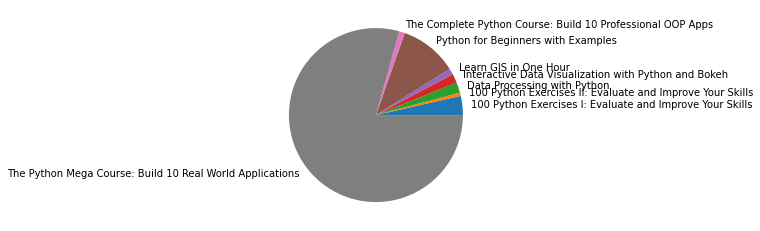

In [106]:
plt.pie(rating_by_course, labels=rating_by_course.index)